In [31]:
using Plots
using Metaheuristics
gr()

Plots.GRBackend()

## Ejemplo 1

Considere:
$$
f(x) = \sum_{i=1}^n x_i^2
$$

¿Qué propiedades tiene?

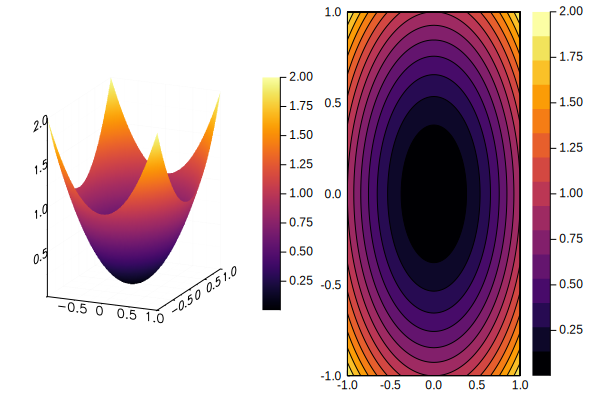

In [32]:
f(x⃗) = sum(x⃗.^2)

f(x, y) = f(Float64[x,y])

X = Y = range(-1, 1, length=100)
l = @layout [a b] 
plot(X, Y, f, lt=[:surface, :contourf], layout=l)

## Ejemplo 2

Considere:
$$
    f(x) = 10n + \sum_{i=1}^n x_i^2 - 10\cos(2\pi x_i)
$$
¿Qué propiedades tiene?

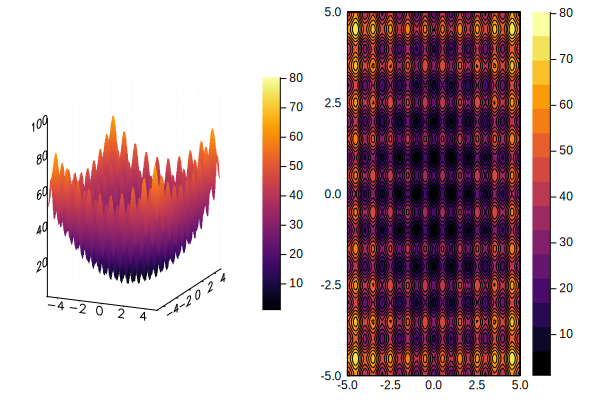

In [33]:
f(x⃗) = 10length(x⃗) + sum(x⃗.^2 - 10cos.(2π*x⃗))

f(x, y) = f(Float64[x,y])

X = Y = range(-5, 5, length=100)

l = @layout [a b] 
plot(X, Y, f, lt=[:surface, :contourf], layout=l)

## Minimizando Ejemplo 1

Minimizar usando ED:
$$
f(x) = \sum_{i=1}^n x_i^2,
$$
donde
$$
x\in [-5, 5]^n
$$

In [34]:
# función objetivo
f(x⃗) = sum(x⃗.^2)

limites = [
    -5  -5
     5  5.0
]

# dimensión del problema
n = size(limites, 2)

# optimizando con Evolución diferencial
x, f_x = DE(f, n, limits = limites)

============[ ED results ]=============
| Generations = 999
| Evals       = 20000
| best sol.   = 0.0


([0.0, 0.0], 0.0)

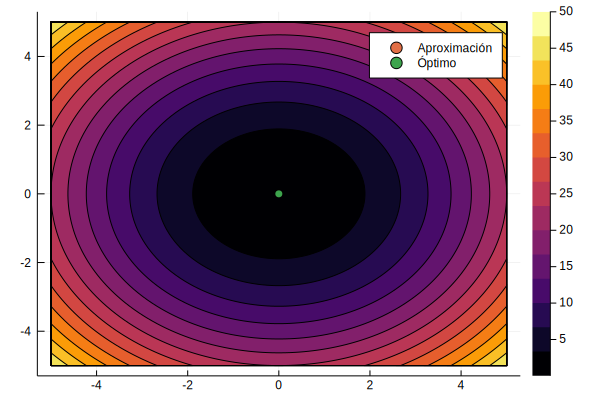

In [35]:
X = range(-5, 5, length=100)
Y = range(-5, 5, length=100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación")
scatter!([0.0], [0.0], label="Óptimo")

## Minimizando Ejemplo 2

Minimizar usando DE:
$$
    f(x) = 10n + \sum_{i=1}^n x_i^2 - 10\cos(2\pi x_i)
$$
donde
$$
x\in [-5, 5]^n
$$

In [36]:
f(x⃗) = 10length(x⃗) + sum(x⃗.^2 - 10cos.(2π*x⃗))

limites = [
    -5  -5
     5  5.0
]

n = size(limites, 2)

x, f_x = DE(f, n, limits = limites)

============[ ED results ]=============
| Generations = 999
| Evals       = 20000
| best sol.   = 0.0


([2.17223e-9, 1.27141e-10], 0.0)

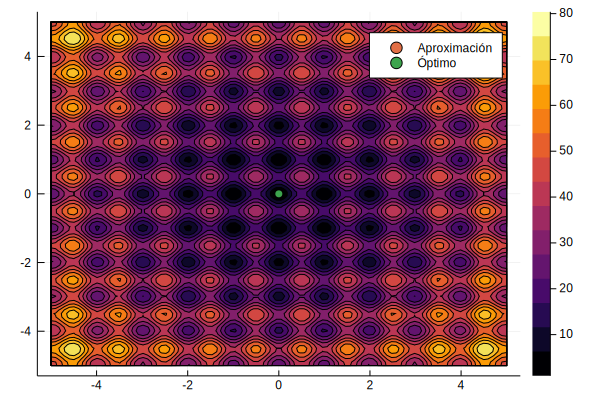

In [37]:
X = range(-5, 5, length=100)
Y = range(-5, 5, length=100)
contourf(X, Y, f)

scatter!([x[1]], [x[2]], label="Aproximación")
scatter!([0.0], [0.0], label="Óptimo")

## PSO

Optimice la función esfera usando PSO con sobre un espacio 10-dimensional

In [38]:
f(x⃗) = sum(x⃗.^2)

# dimensión
n = 10

x, f_x = pso(f, n, limits = (-5.0, 5))

============[ PSO results ]============
| Generations = 1000
| Evals.      = 100100
| best sol.   = 4.383990405910712e-15
| mean sol    = 0.053366279398662425
| std. sol    = 0.3850264254626061


([1.45436e-8, 2.27475e-9, 2.18771e-8, 3.52351e-8, 1.27483e-8, -4.36613e-8, 8.4186e-9, 1.31483e-8, 1.15914e-8, 4.89904e-10], 4.383990405910712e-15)

## Problema de Caja-negra

El valor óptimo de esta función es 0, es decir, $f(x^*)=0$.

Considere $D = 2$.

============[ ED results ]=============
| Generations = 999
| Evals       = 20000
| best sol.   = 0.46558836416033955
============[ PSO results ]============
| Generations = 1000
| Evals.      = 20020
| best sol.   = 0.0
| mean sol    = 0.029273238770400667
| std. sol    = 0.12600786031927147
ED: [-22.0517, -74.595]
PSO: [-21.8715, -74.5282]


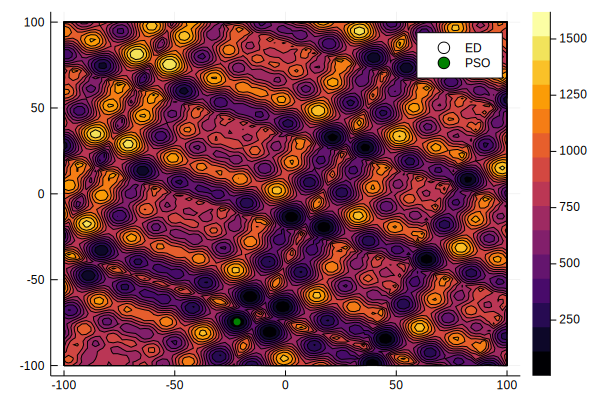

In [39]:
using CEC17

# función objetivo
f(x) = cec17_test_func(x, 10) - 1000.0

# dimensión
D = 2


# parámetros ED
F  = 1.0 # Tamaño de paso
CR = 0.9 # cruza

# parámetros PSO
C1 = 2.0
C2 = 2.0
ω  = 0.8



# resultados de evolución diferencial
x_DE, f_x_DE = DE(f, D; F = F, CR = CR)

# resultados de PSO
x_PSO, f_x_PSO = pso(f, D; C1=C1,C2=C2,ω=ω)

println("ED: ", x_DE)
println("PSO: ", x_PSO)

# gráfica
X = range(-100, 100, length=100)
Y = range(-100, 100, length=100)

contourf(X, Y, f)
scatter!([x_DE[1]], [x_DE[2]], label="ED", color=:white)
scatter!([x_PSO[1]], [x_PSO[2]], label="PSO", color=:green)


### ¿Qué pasa con D=10, 30, 100? 

============[ ED results ]=============
| Generations = 999
| Evals       = 100000
| best sol.   = 1312.2901801190997


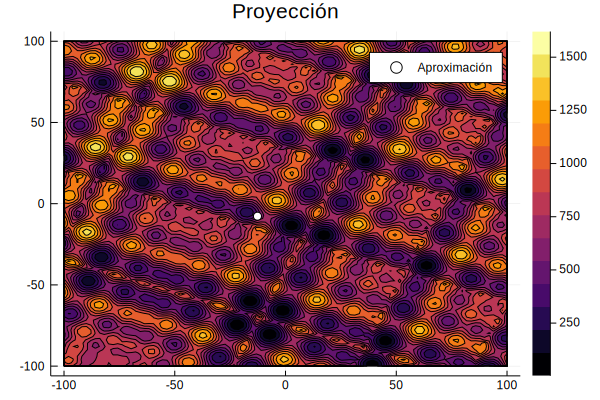

In [40]:
# función objetivo
f(x) = cec17_test_func(x, 10) - 1000.0

D = 10 # valores posibles: 10, 30, 50 ó 100.
# No usar otros valores para D ó el mundo se romperá.

x, f_x = DE(f, D)

X = range(-100, 100, length=100)
Y = range(-100, 100, length=100)

contourf(X, Y, f, title="Proyección")
scatter!([x[1]], [x[2]], label="Aproximación", color=:white)